In [ ]:
# import necessary libraries for analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.style as style
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix, classification_report
plt.style.use('ggplot')

In [ ]:
# import the data from product management
df = pd.read_csv('recipe_site_traffic_2212.csv')
df.head()

,recipe,calories,carbohydrate,sugar,protein,category,servings,high_traffic
0,1,NaN,NaN,NaN,NaN,Pork,6,High
1,2,35.48,38.56,0.66,0.92,Potato,4,High
2,3,914.28,42.68,3.09,2.88,Breakfast,1,NaN
3,4,97.03,30.56,38.63,0.02,Beverages,4,High
4,5,27.05,1.85,0.80,0.53,Beverages,4,NaN


In [ ]:
# getting to know the data & data validation
# see further down for full validation report
print(
      df.shape, '\n',
      df.describe(), '\n',
      df.info(), '\n',
      df.isna().sum(), '\n',
      df.duplicated().value_counts()
)
df.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 947 entries, 0 to 946
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   recipe        947 non-null    int64  
 1   calories      895 non-null    float64
 2   carbohydrate  895 non-null    float64
 3   sugar         895 non-null    float64
 4   protein       895 non-null    float64
 5   category      947 non-null    object 
 6   servings      947 non-null    object 
 7   high_traffic  574 non-null    object 
dtypes: float64(4), int64(1), object(3)
memory usage: 59.3+ KB
(947, 8) 
            recipe     calories  carbohydrate       sugar     protein
count  947.000000   895.000000    895.000000  895.000000  895.000000
mean   474.000000   435.939196     35.069676    9.046547   24.149296
std    273.519652   453.020997     43.949032   14.679176   36.369739
min      1.000000     0.140000      0.030000    0.010000    0.000000
25%    237.500000   110.430000      8.375000   

Index(['recipe', 'calories', 'carbohydrate', 'sugar', 'protein', 'category',
       'servings', 'high_traffic'],
      dtype='object')

In [ ]:
# validating the variables: recipe
print(
    df['recipe'].duplicated().value_counts(), '\n',
    df['recipe'].nunique()
)

recipe
False    947
Name: count, dtype: int64 
 947


In [ ]:
# validating the variables: calories
print(
    df['calories'].duplicated().value_counts(), '\n',
    df['calories'].nunique()
)


calories
False    892
True      55
Name: count, dtype: int64 
 891


In [ ]:
# validating the variables: carbohydrate
print(
    df['carbohydrate'].duplicated().value_counts(), '\n',
    df['carbohydrate'].nunique()
)


carbohydrate
False    836
True     111
Name: count, dtype: int64 
 835


In [ ]:
# validating the variables: sugar
print(
    df['sugar'].duplicated().value_counts(), '\n',
    df['sugar'].nunique()
)


sugar
False    667
True     280
Name: count, dtype: int64 
 666


In [ ]:
# validating the variables: protein
print(
    df['protein'].duplicated().value_counts(), '\n',
    df['protein'].nunique(), '\n',
)
df[df['protein'] == 0].sort_values(by='protein')

protein
False    773
True     174
Name: count, dtype: int64 
 772 



,recipe,calories,carbohydrate,sugar,protein,category,servings,high_traffic
468,469,27.11,22.63,4.93,0.0,Beverages,1,NaN
812,813,550.71,11.53,0.35,0.0,Potato,2,High


In [ ]:
# validating the variables: category
print(
    df['category'].duplicated().value_counts(), '\n',
    df['category'].nunique(), '\n',
    df['category'].unique()
)


category
True     936
False     11
Name: count, dtype: int64 
 11 
 ['Pork' 'Potato' 'Breakfast' 'Beverages' 'One Dish Meal' 'Chicken Breast'
 'Lunch/Snacks' 'Chicken' 'Vegetable' 'Meat' 'Dessert']


In [ ]:
# validating the variables: servings
print(
    df['servings'].duplicated().value_counts(), '\n',
    df['servings'].nunique(), '\n',
    df['servings'].unique()
)

servings
True     941
False      6
Name: count, dtype: int64 
 6 
 ['6' '4' '1' '2' '4 as a snack' '6 as a snack']


In [ ]:
# validating the variables: high_traffic
print(
    df['high_traffic'].duplicated().value_counts(), '\n',
    df['high_traffic'].nunique(), '\n',
    df['high_traffic'].unique()
)

high_traffic
True     945
False      2
Name: count, dtype: int64 
 1 
 ['High' nan]


In [ ]:
# data cleaning
# first remove missing values
df = df[~df.calories.isna()]
df.info()

# change wrong values for 'servings' & change type
df['servings'] = df['servings'].replace({'6 as a snack': '6', '4 as a snack': '4'})
df['servings'] = pd.to_numeric(df['servings'])
print(
    df['servings'].unique(),
    df.servings.dtype
)

# change wrong values for 'category'
df['category'] = df['category'].replace({'Chicken Breast': 'Chicken'})
print(
    df['category'].nunique(),
    df['category'].unique()
)


<class 'pandas.core.frame.DataFrame'>
Index: 895 entries, 1 to 946
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   recipe        895 non-null    int64  
 1   calories      895 non-null    float64
 2   carbohydrate  895 non-null    float64
 3   sugar         895 non-null    float64
 4   protein       895 non-null    float64
 5   category      895 non-null    object 
 6   servings      895 non-null    object 
 7   high_traffic  535 non-null    object 
dtypes: float64(4), int64(1), object(3)
memory usage: 62.9+ KB
[4 1 2 6] int64
10 ['Potato' 'Breakfast' 'Beverages' 'One Dish Meal' 'Chicken' 'Lunch/Snacks'
 'Pork' 'Vegetable' 'Meat' 'Dessert']


In [ ]:
# rechecking cleaned df
print(
      df.shape, '\n',
      df.info(), '\n',
      df.isna().sum(), '\n',
      df.duplicated().value_counts()
)
df.describe()

<class 'pandas.core.frame.DataFrame'>
Index: 895 entries, 1 to 946
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   recipe        895 non-null    int64  
 1   calories      895 non-null    float64
 2   carbohydrate  895 non-null    float64
 3   sugar         895 non-null    float64
 4   protein       895 non-null    float64
 5   category      895 non-null    object 
 6   servings      895 non-null    int64  
 7   high_traffic  535 non-null    object 
dtypes: float64(4), int64(2), object(2)
memory usage: 62.9+ KB
(895, 8) 
 None 
 recipe            0
calories          0
carbohydrate      0
sugar             0
protein           0
category          0
servings          0
high_traffic    360
dtype: int64 
 False    895
Name: count, dtype: int64


,recipe,calories,carbohydrate,sugar,protein,servings
count,895.000000,895.000000,895.000000,895.000000,895.000000,895.000000
mean,473.652514,435.939196,35.069676,9.046547,24.149296,3.458101
std,272.763283,453.020997,43.949032,14.679176,36.369739,1.735979
min,2.000000,0.140000,0.030000,0.010000,0.000000,1.000000
25%,237.500000,110.430000,8.375000,1.690000,3.195000,2.000000
50%,475.000000,288.550000,21.480000,4.550000,10.800000,4.000000
75%,708.500000,597.650000,44.965000,9.800000,30.200000,4.000000
max,947.000000,3633.160000,530.420000,148.750000,363.360000,6.000000


This data set has 947 rows, 8 columns. I have validated all variables and made some changes. Some columns (calories, carbohydrate, sugar and protein) had missing values which I decided to remove. Since no way of imputation made sense (mean, median, mode) as differnet meals can have fastly different nutrients and imputation would possibly have introduced distortion into the model. Also 52 values were missing in each column out of 947, which is about 5.5% of data. This is an acceptable amount to remove, without sacrificing to much information. Find a description of all made changes for every single variable below:

- model: 18 models without missing values, same as the description. No cleaning is needed.
- recipe: Numeric, unique identifier, no missing values, as excpected, no changes made.
- calories: Numeric (float), 52 missing values were removed, non null values range from 0.14 to 3633.16, which seems like a big spread, but within potential range of calories of one meal, so no outliers expected.
- carbohydrate: Numeric (float), 52 missing values were removed, non null values range from 0.03 to 530.42. Normal range.
- sugar: Numeric (float), 52 missing values were removed, non null values range from 0.01 to 148.75. Normal range.
- protein: Numeric (float), 52 missing values were removed, non null values range from 0.00 to 363.36. Normal range as 0 values are a receipe of category beverage and potato respectively, which may have 0 protein. (Although potatoes themselves have about 2g of protein per 100g, but we don´t know the exact making and use of potatoes in the recipe, so I decided to keep this row of data)
- category: object type, there was one wrong category "Chicken breast" which was renamed to "chicken", otherwise the 10 categories which were expected.
- servings: numeric (int), there were two wrong serving values "4 as a snack" and "6 as a snack" which were renamed to "4" and "6" respectively, also they were converted to numeric values, as there will be no label encoder needed later on (ths is only possible as these values are on a intervall scale). Otherwise there were 4 types of servings [1, 2, 4, 6].
- high_traffic: object type, 535 rows are classified as "high", others are "nan", these two values were expected.

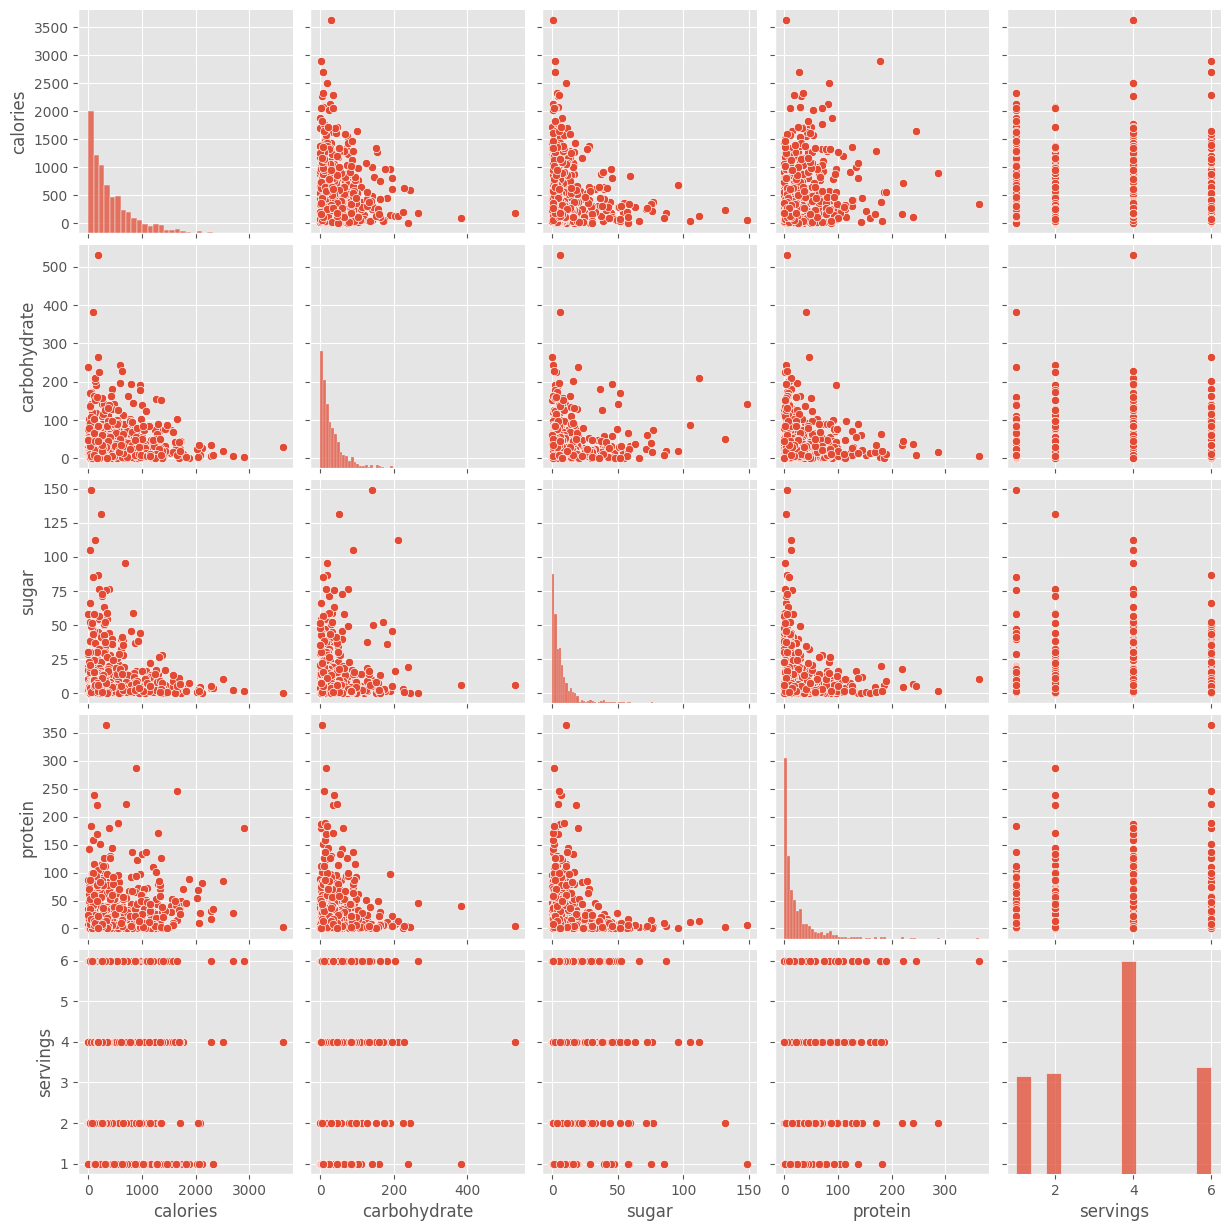

In [ ]:
# visualization of numeric values: pairplot for correlation overview

sns.pairplot(df.drop('recipe', axis=1))
plt.show()

In [ ]:
# visualization of numeric values: heatmap of correlation
sns.heatmap(df.drop('recipe', axis=1).corr(), annot=True)
plt.show()

ValueError: could not convert string to float: 'Potato'

After checking for correlation between the numeric values there is no sign of multicollinearity. Strongest correlation between calories and protein, but just at 0.17. Interesting to see that calories and carbohydrate as well as calories and sugar are negatively correlated. This suggests that the higher the calories of a meal, the less sugar/carbs it has. Protein on the other hand is positively correlated. I can only imagine that the missing nutrient "fat" would paint a clearer picture if the data was available. Also interesting that servings is negatively correlated with all other numeric variables. One would expect a higher calorie count as the servings go up. This suggests that the calories a re represented as "per serving". This is also to expected as this is exactly how it is shown on the website. Seems like a good starting point for the model.

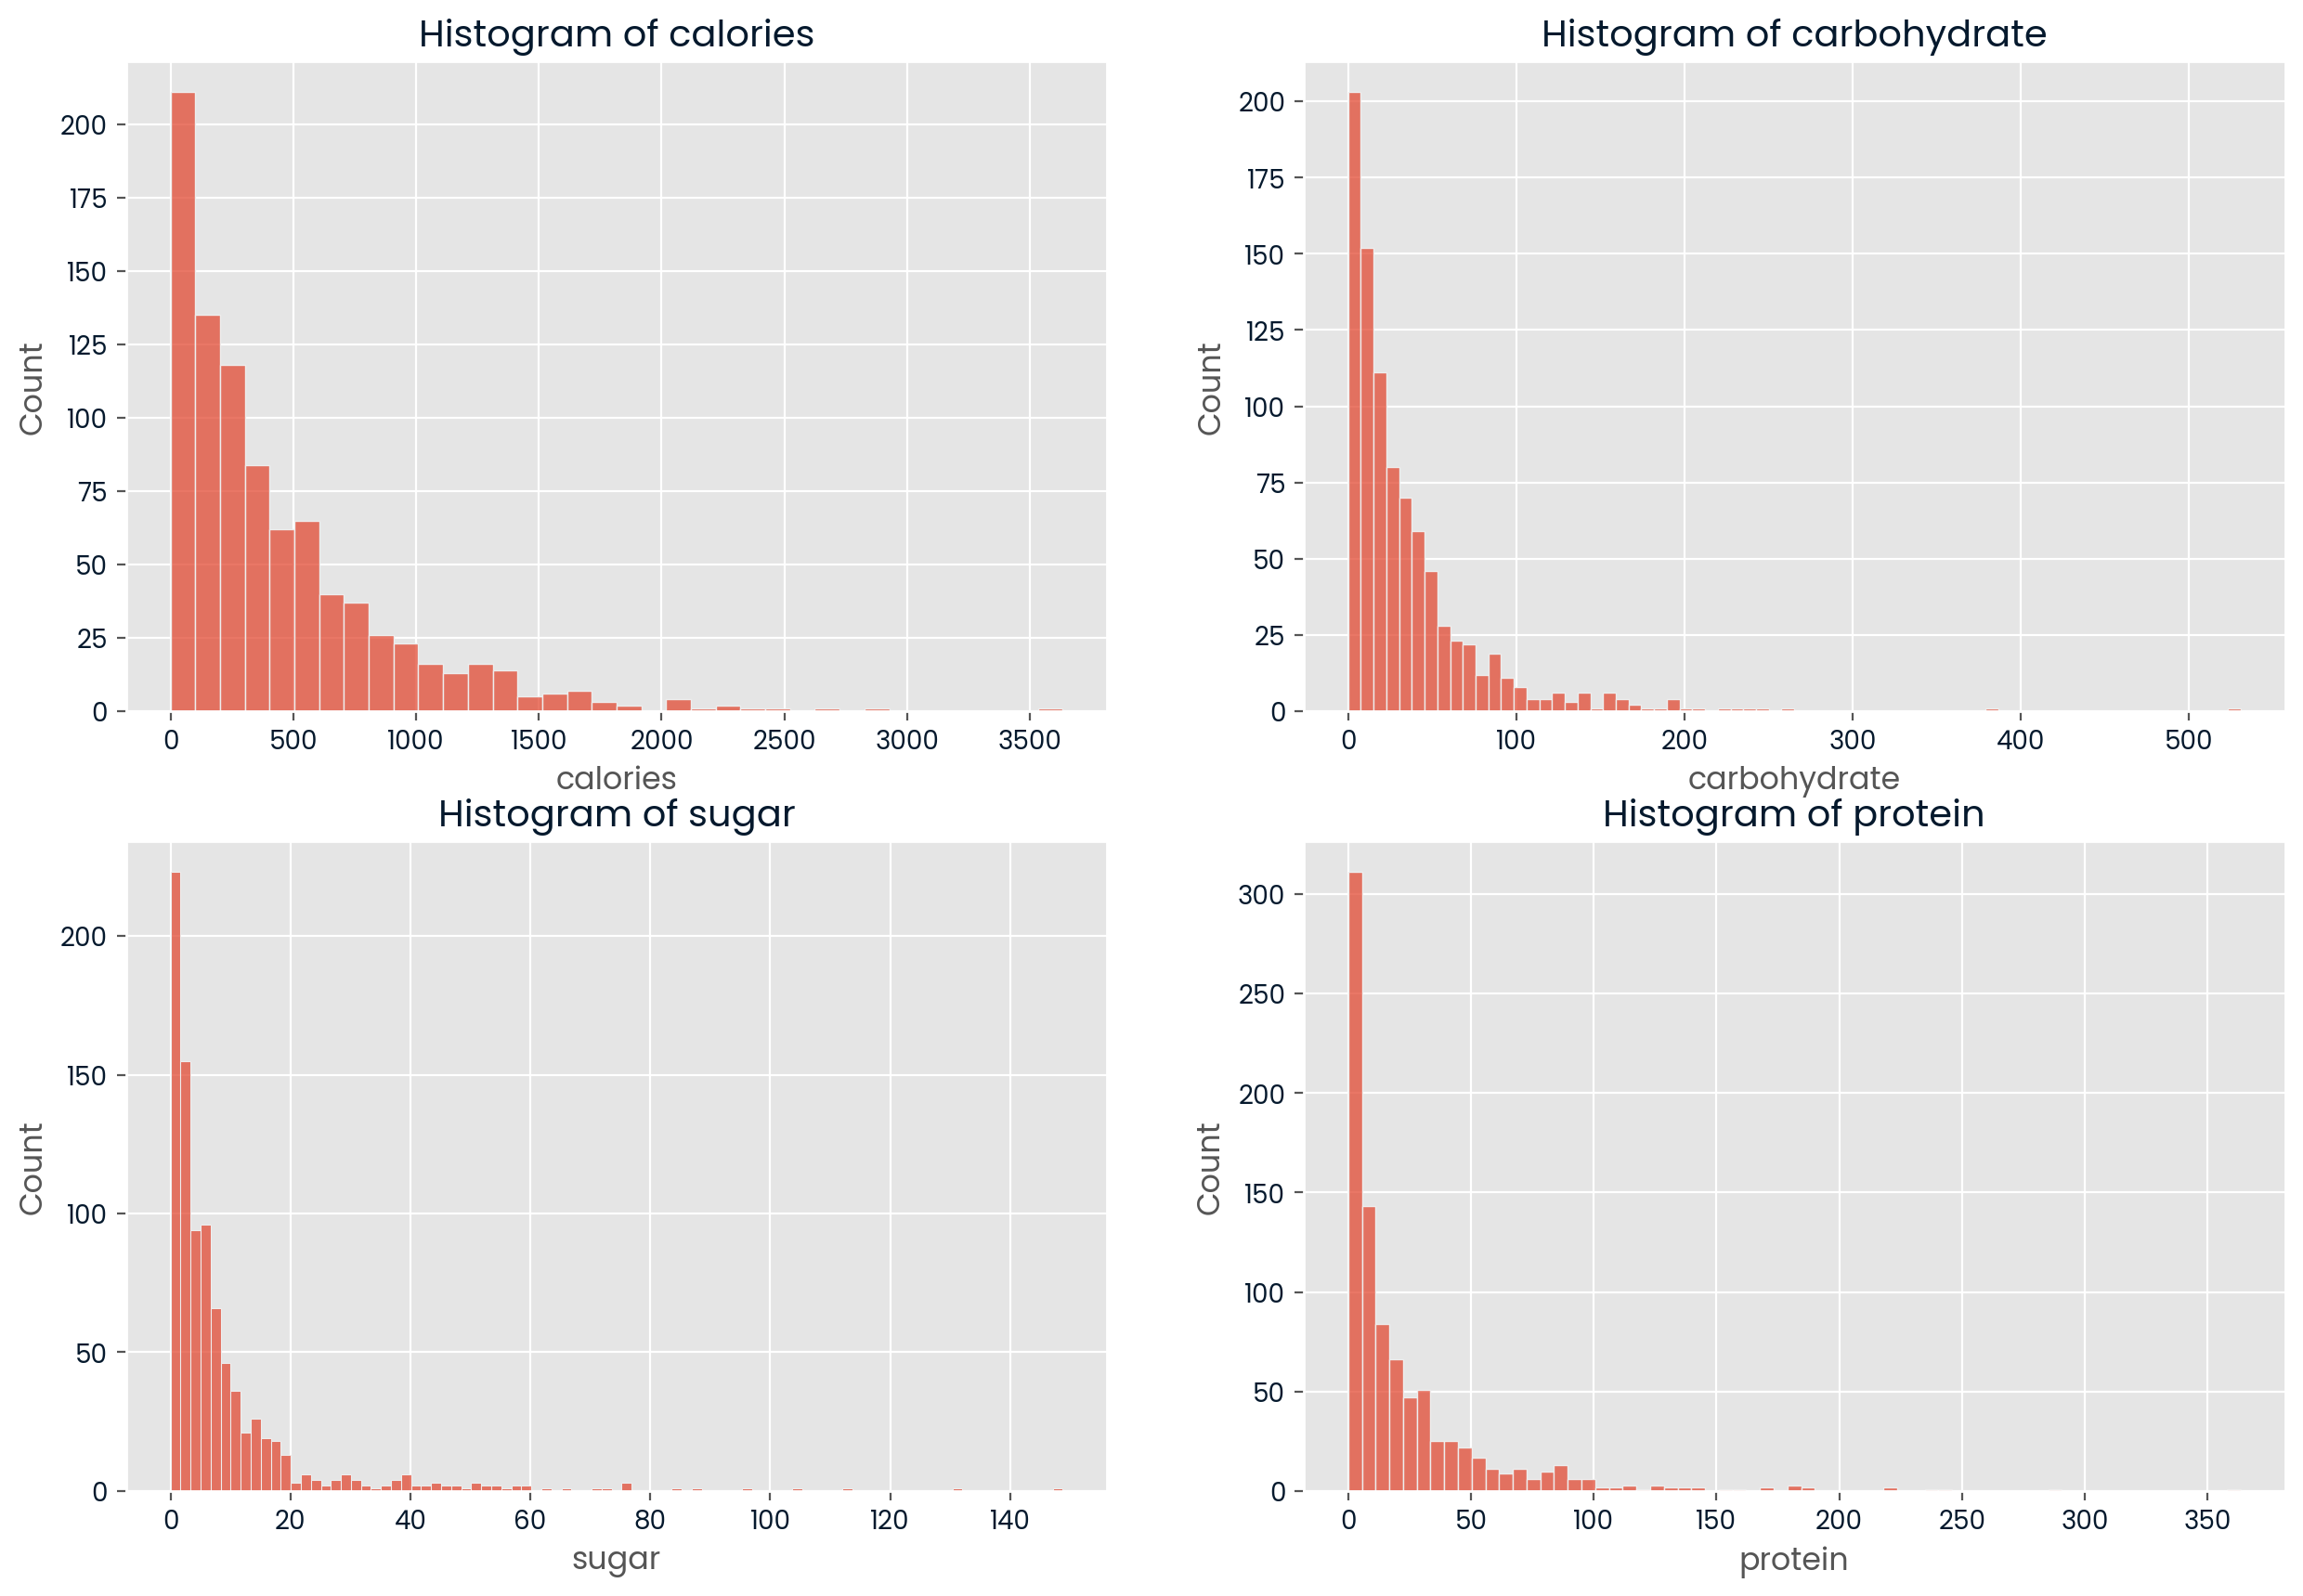

In [ ]:
# visualization of numeric values: histplot for different nutrients

fig, axes = plt.subplots(2,2,figsize=(15,10))
sns.histplot(df['calories'], ax=axes[0][0]).set(title='Histogram of calories')
sns.histplot(df['carbohydrate'], ax=axes[0][1]).set(title='Histogram of carbohydrate')
sns.histplot(df['sugar'], ax=axes[1][0]).set(title='Histogram of sugar')
sns.histplot(df['protein'], ax=axes[1][1]).set(title='Histogram of protein')
plt.show()

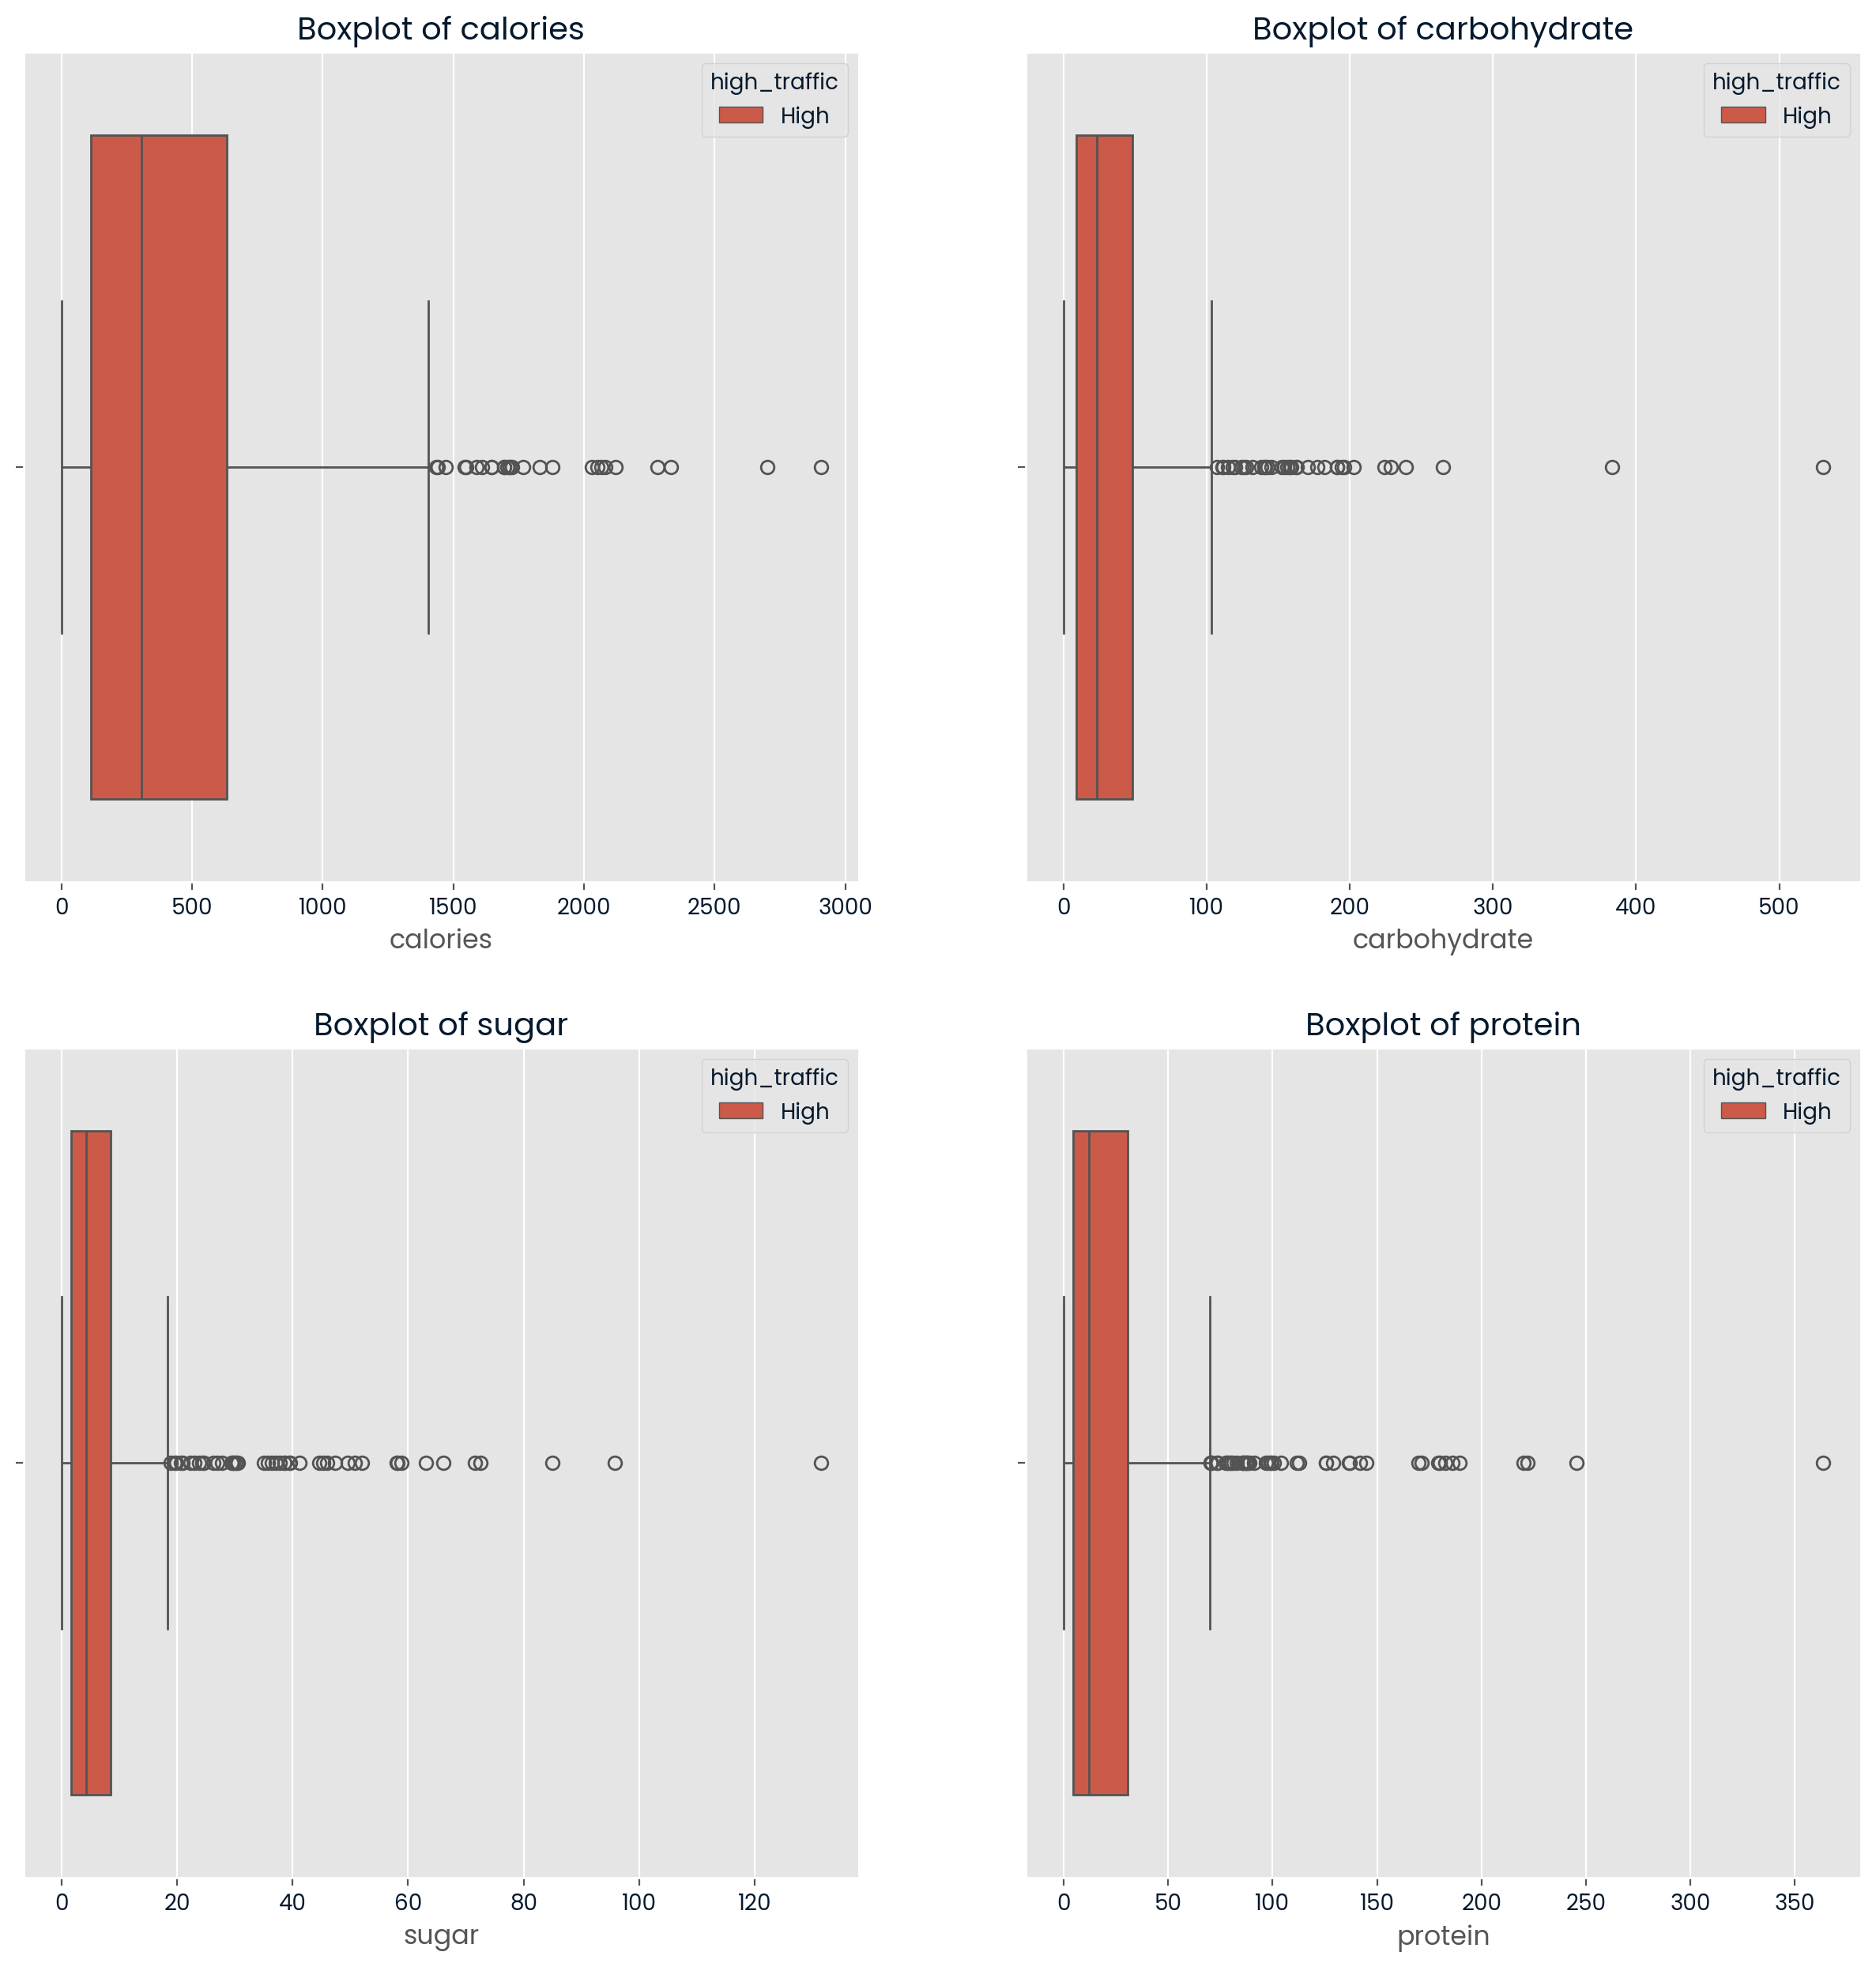

In [ ]:
# visualization of numeric values: boxplot for different nutrients

fig, axes = plt.subplots(2,2,figsize=(15,15))
sns.boxplot(data=df, x='calories', ax=axes[0][0], hue='high_traffic').set(title='Boxplot of calories')
sns.boxplot(data=df, x='carbohydrate', ax=axes[0][1], hue='high_traffic').set(title='Boxplot of carbohydrate')
sns.boxplot(data=df, x='sugar', ax=axes[1][0], hue='high_traffic').set(title='Boxplot of sugar')
sns.boxplot(data=df, x='protein', ax=axes[1][1], hue='high_traffic').set(title='Boxplot of protein')
plt.show()

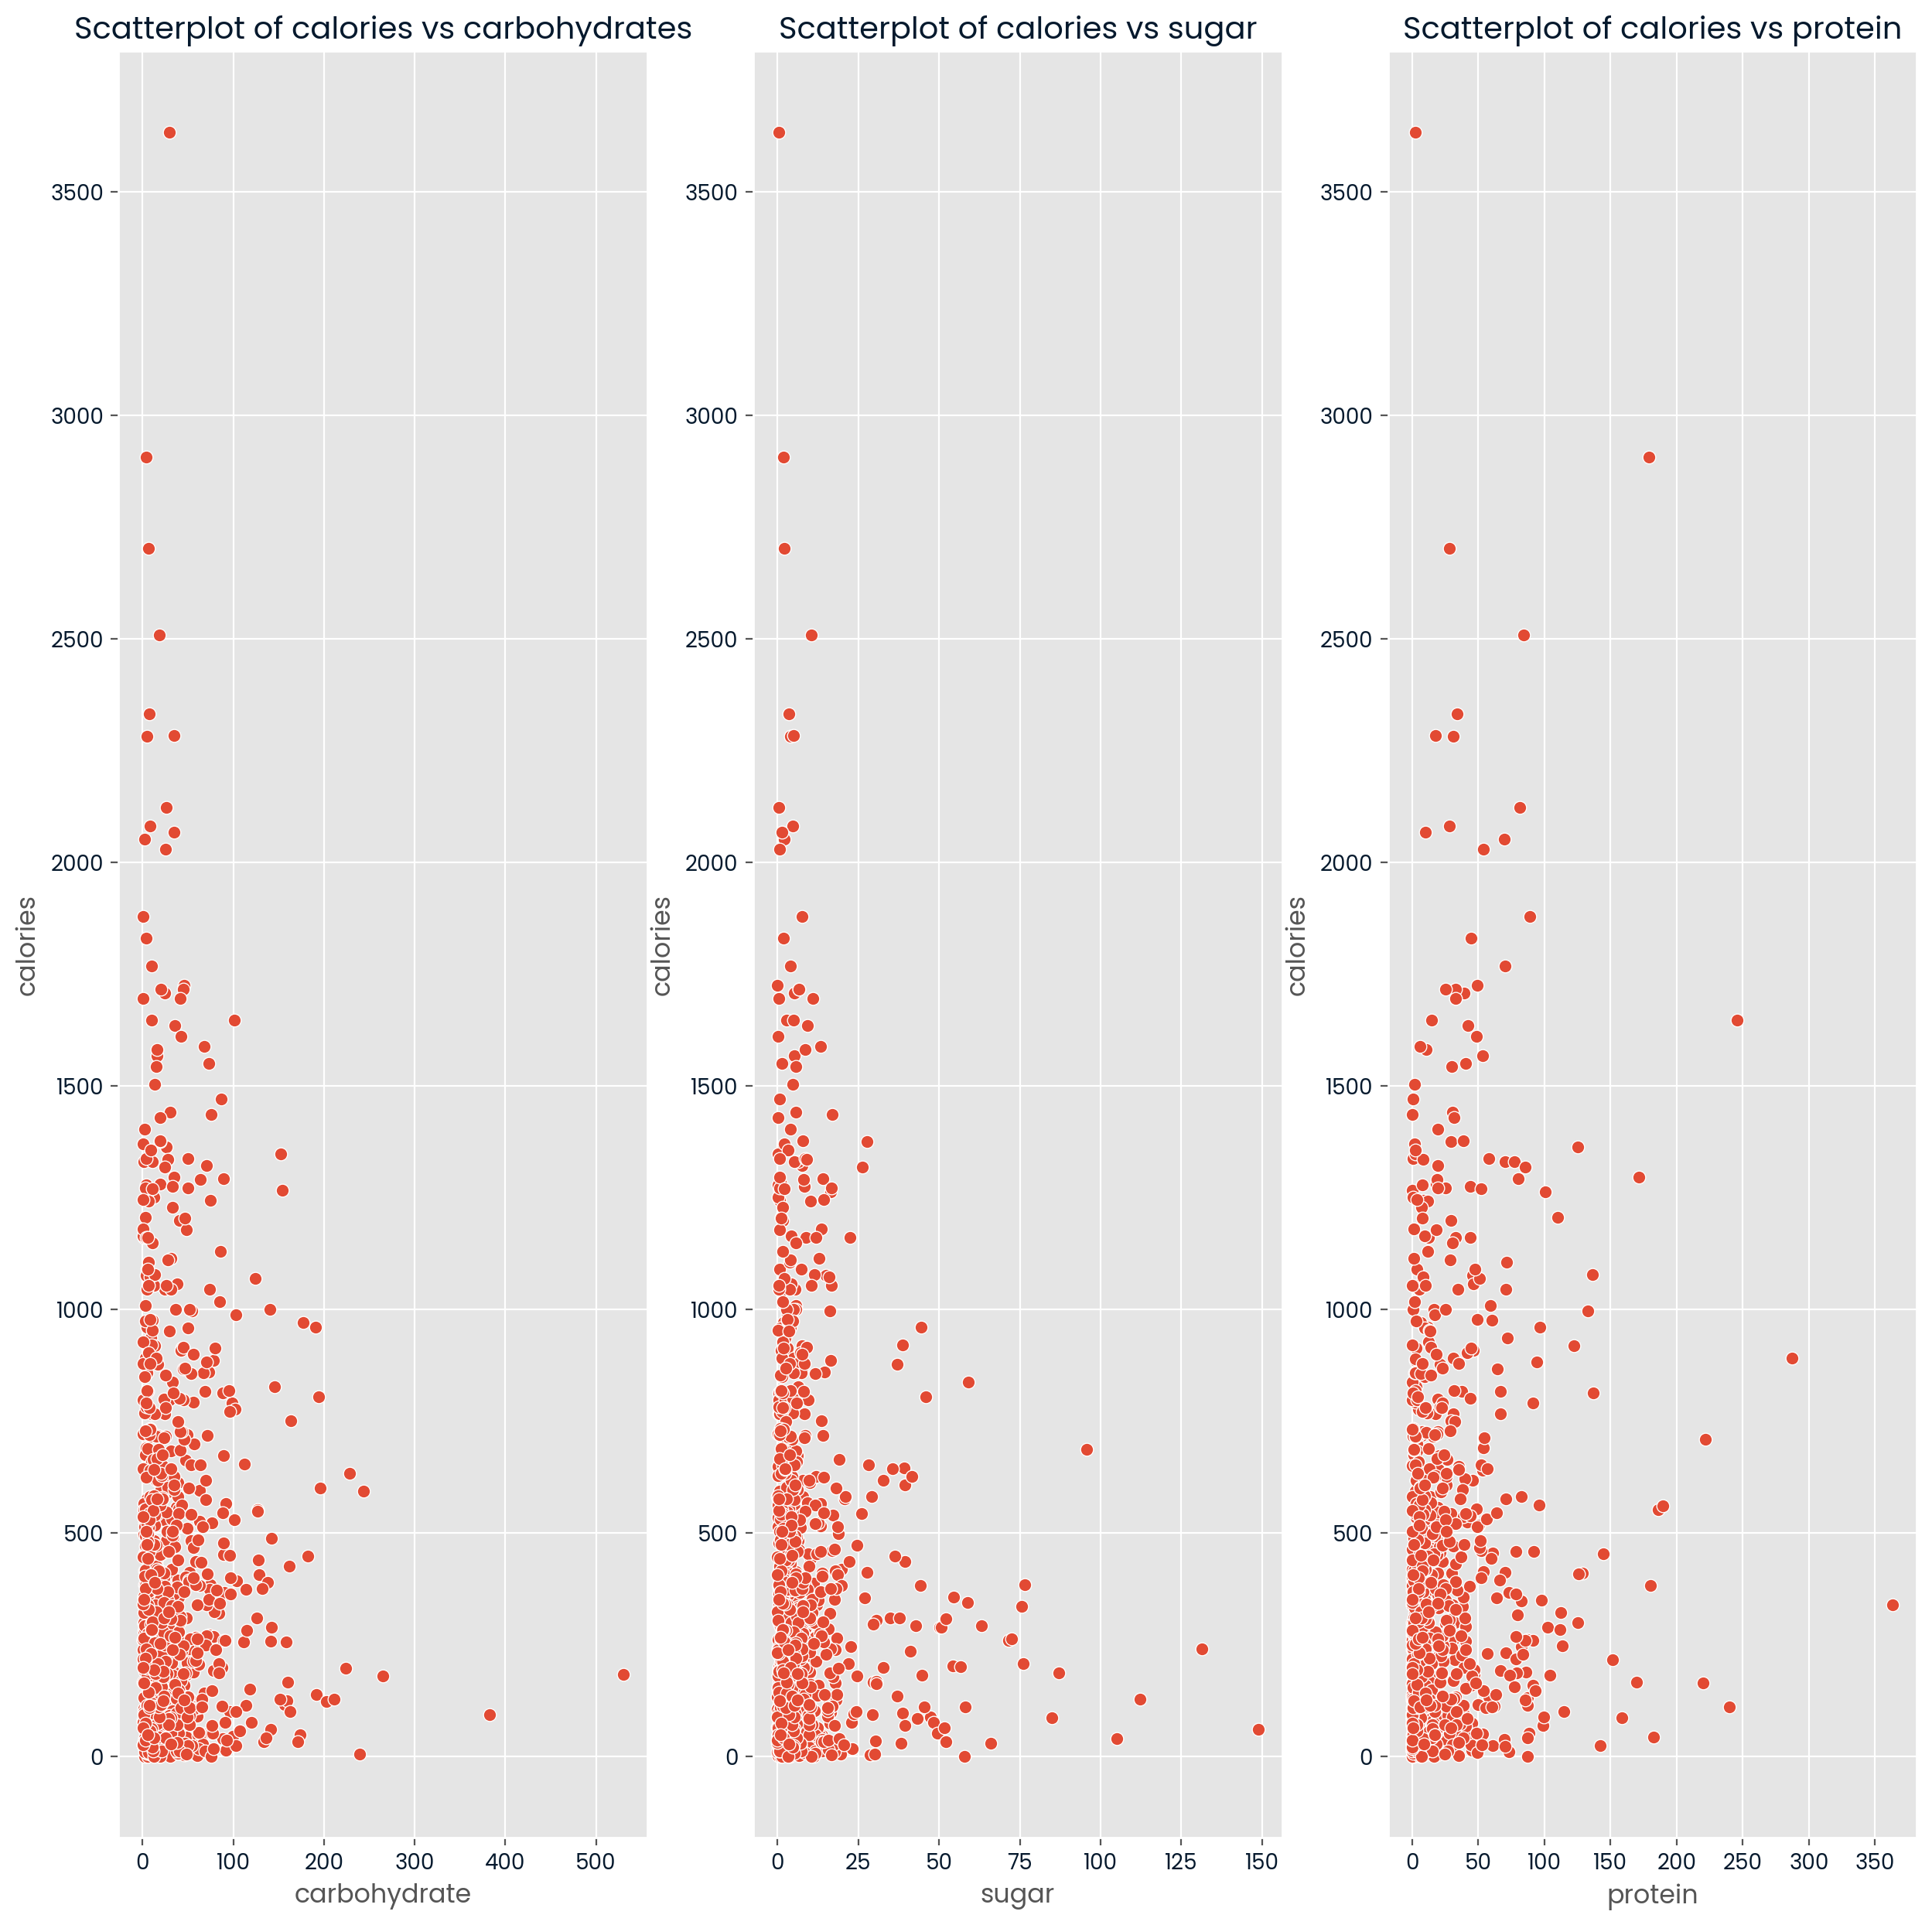

In [ ]:
# visualization of numeric values: relations between nutrients and calories

fig, axes = plt.subplots(1,3,figsize=(15,15))
sns.scatterplot(data=df, x='carbohydrate', y='calories', ax=axes[0]).set(title='Scatterplot of calories vs carbohydrates')
sns.scatterplot(data=df, x='sugar', y='calories', ax=axes[1]).set(title='Scatterplot of calories vs sugar')
sns.scatterplot(data=df, x='protein', y='calories', ax=axes[2]).set(title='Scatterplot of calories vs protein')
plt.show()

After inspecting the numeric variables further via histograms, the data seems to be heavily right skewed, which means that there are more recipes which have more of the specific nutrients. The number of recipes declines as the number of nutrients declines.

The boxplots show the amount of outliers in the data. It seems like some recipes have a lot more of the specific nutrient than are within the IQR. This suggests some form of transformation later on, like a RobustScaler.

The scatterplots were hard to interpret, scaling them via log tranformation didn´t really solve the problem as no clear linear trend was forming. This supports the findings of the correlation visualisations, which suggest that there is not a clear correlation between the variables.

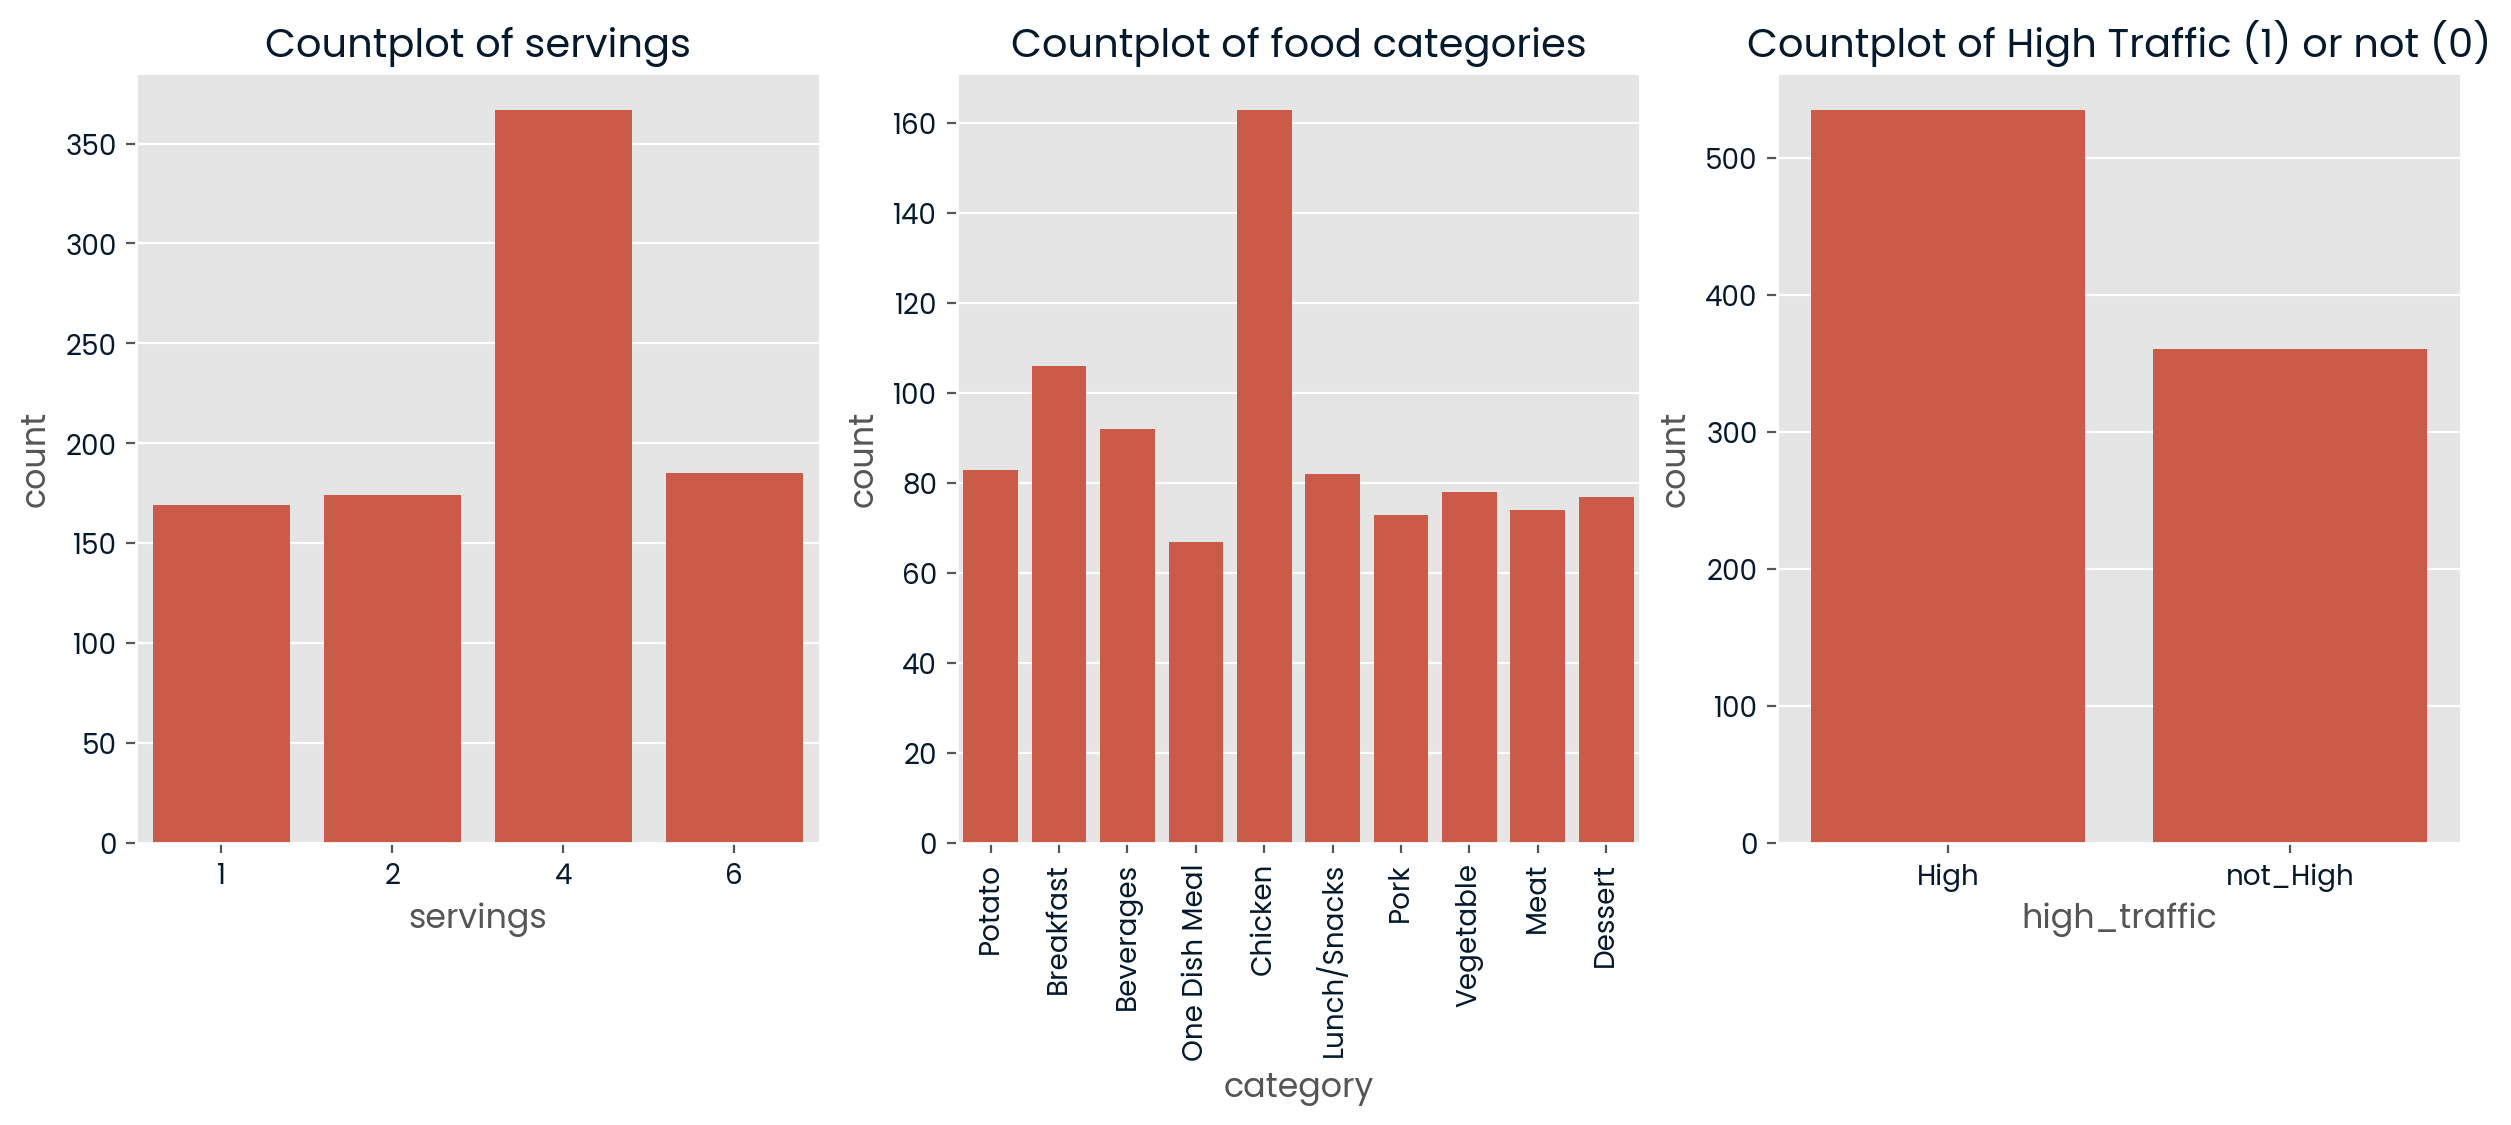

In [ ]:
# visualization of categorical values: countplot of servings, category and high_traffic
fig, axes = plt.subplots(1,3,figsize=(15,5))
sns.countplot(x=df.servings, ax=axes[0]).set(title='Countplot of servings')
sns.countplot(x=df.category, ax=axes[1]).set(title='Countplot of food categories')
sns.countplot(x=df['high_traffic'].fillna('not_High'), ax=axes[2]).set(title='Countplot of High Traffic (1) or not (0)')
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=90)
plt.show()


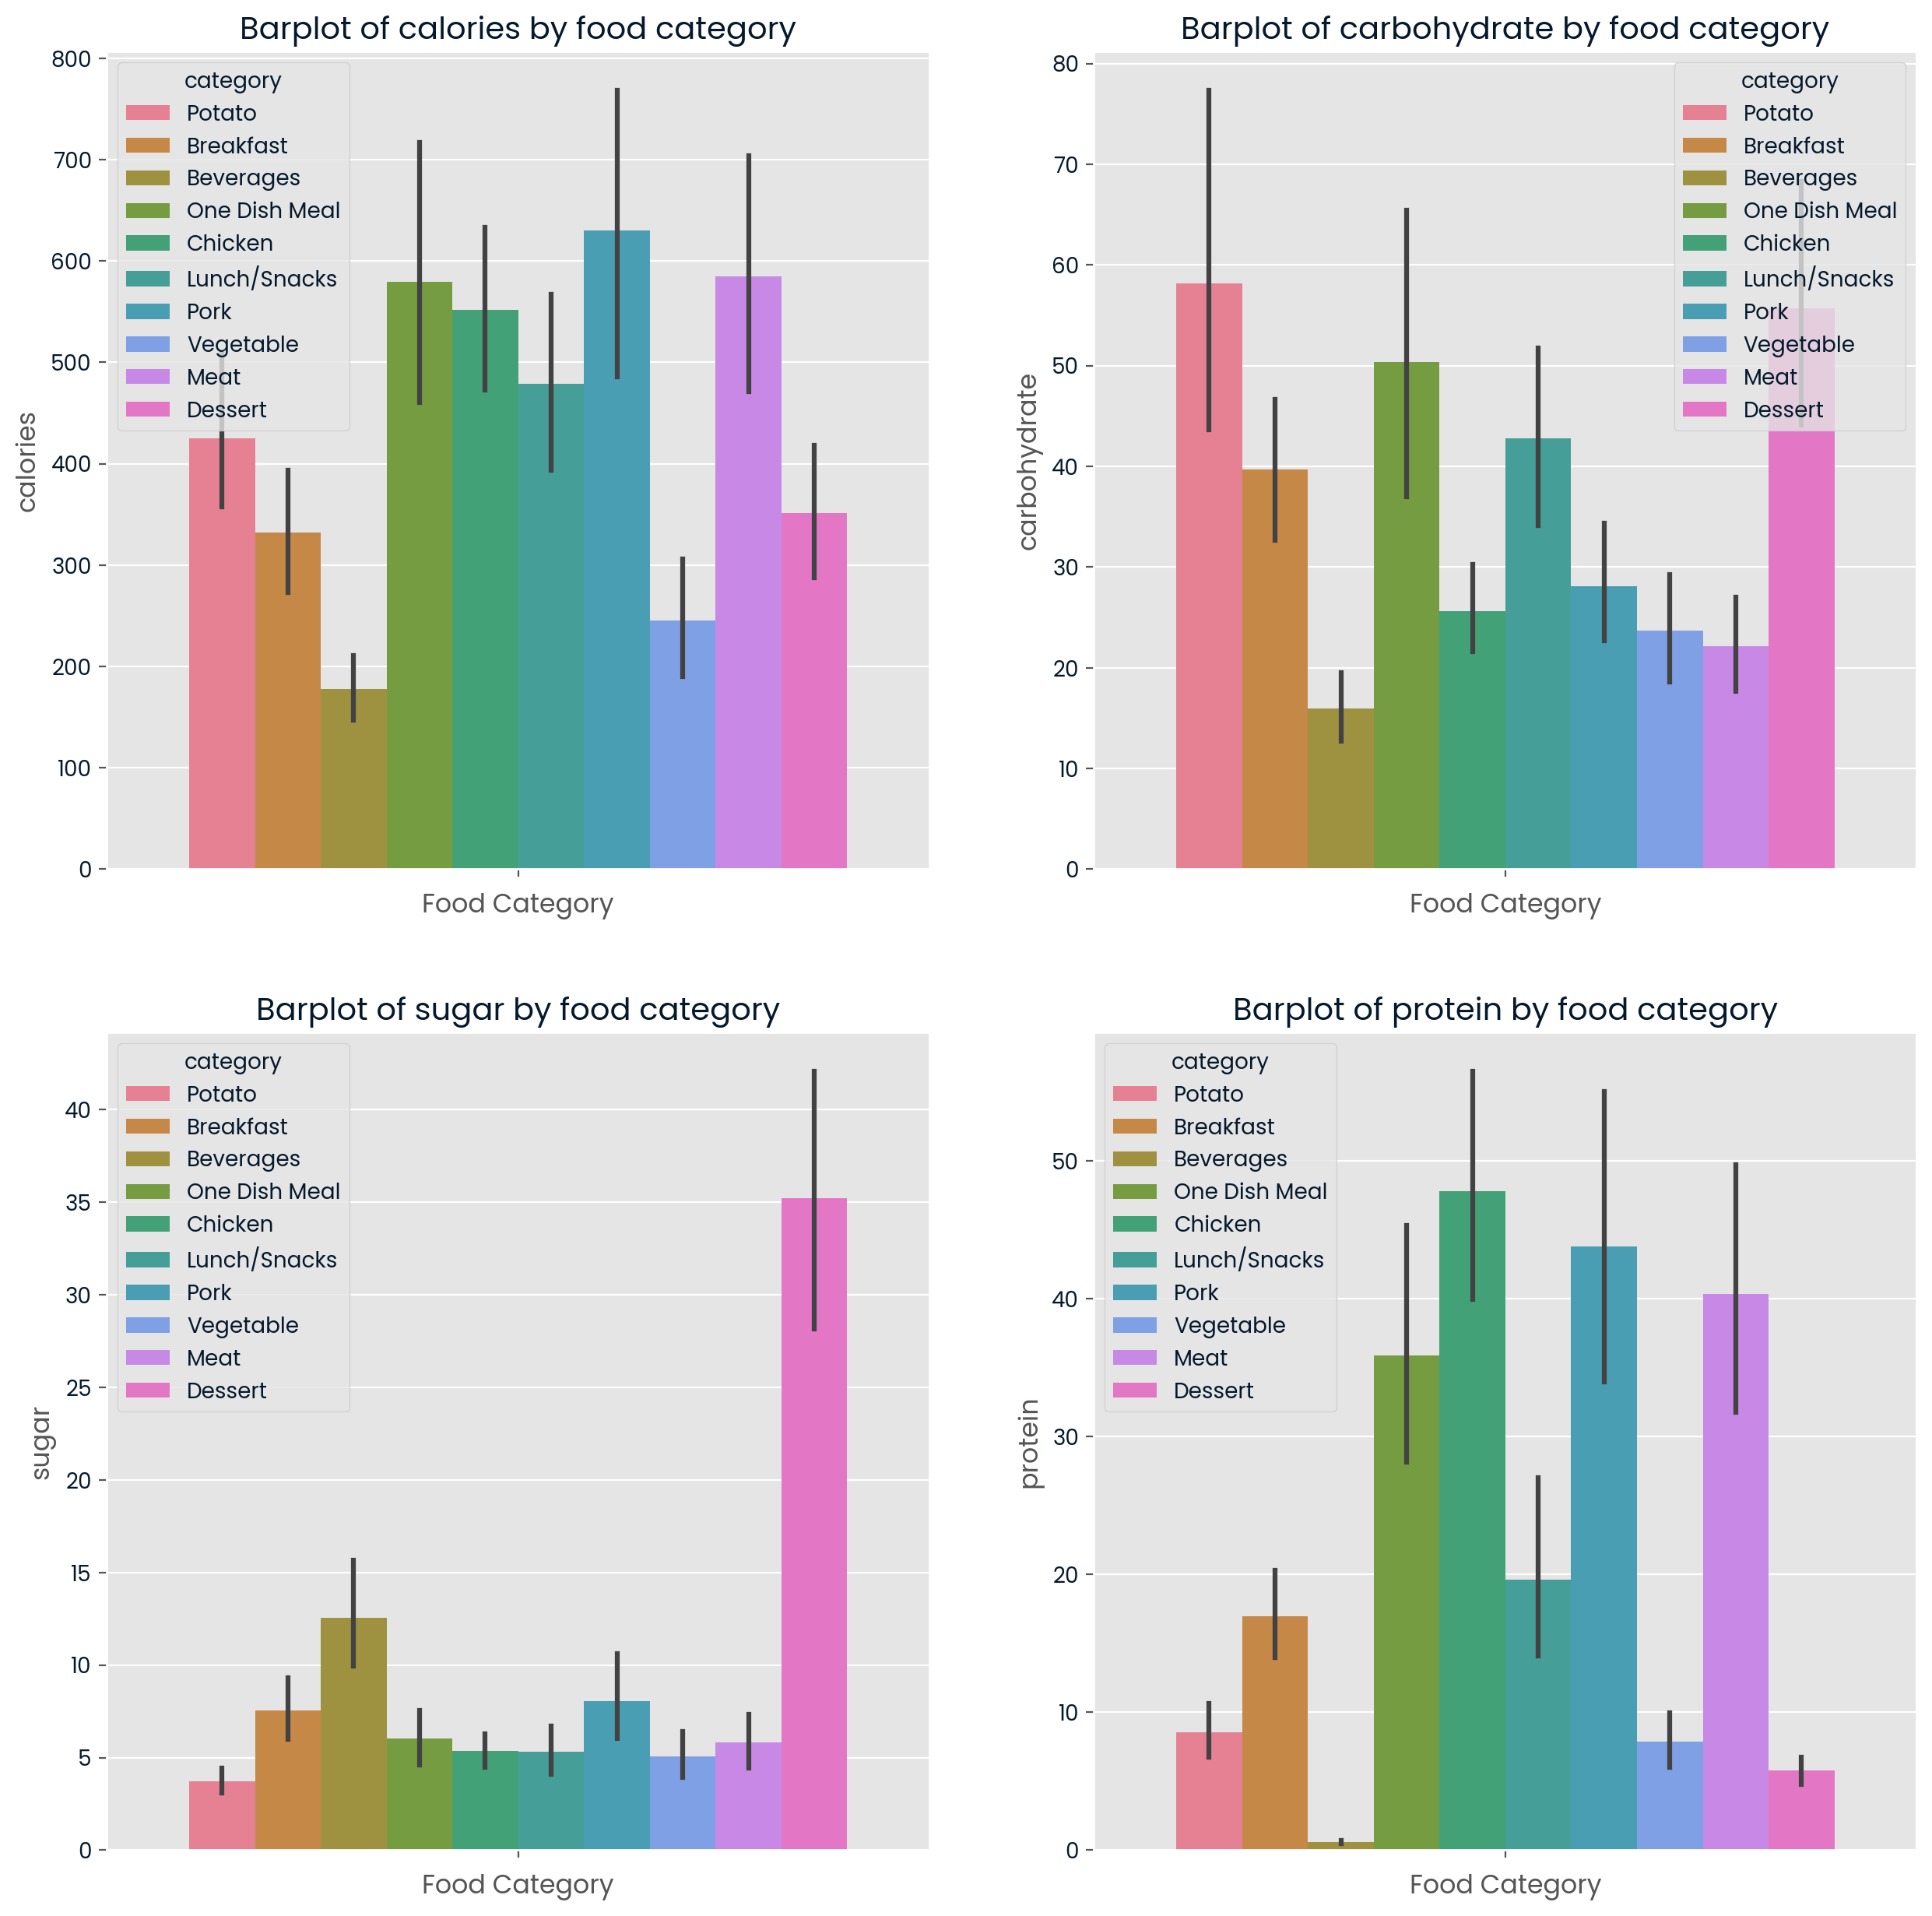

In [ ]:
# visualization of categorical values: mean nutrients per category

fig, axes = plt.subplots(2,2,figsize=(15,15))
sns.barplot(data=df, y='calories', ax=axes[0][0], hue='category').set(title='Barplot of calories by food category', xlabel='Food Category')
sns.barplot(data=df, y='carbohydrate', ax=axes[0][1], hue='category').set(title='Barplot of carbohydrate by food category', xlabel='Food Category')
sns.barplot(data=df, y='sugar', ax=axes[1][0], hue='category').set(title='Barplot of sugar by food category', xlabel='Food Category')
sns.barplot(data=df, y='protein', ax=axes[1][1], hue='category').set(title='Barplot of protein by food category', xlabel='Food Category')
plt.show()

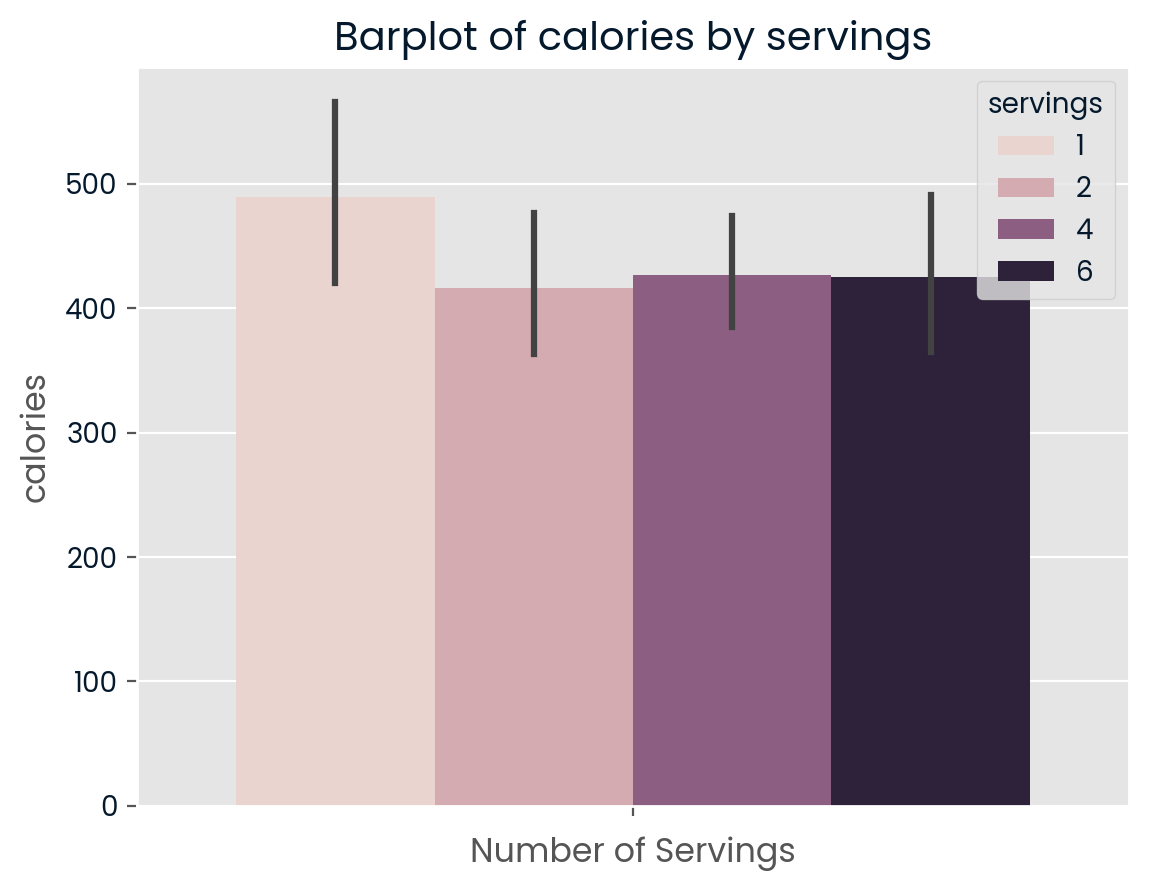

In [ ]:
# visualization of categorical values: mean calories per serving

sns.barplot(data=df, y='calories', hue='servings').set(title='Barplot of calories by servings', xlabel='Number of Servings')
plt.show()

After inspecting the categorical features via different countplots, it seems the most common type of serving size on the website is 4, the most common recipe category is "Chicken" and there are slightly more recipes with high traffic as there are ones with "not high" traffic.

Looking at some barplots which represent the mean of the different nutrients by the food category, it seems that the categories with the highest mean calories are pork, one_dish_meals and meat, while the lowest mean calorie categories are beverages and vegetables. The rest of the barplots represent the mean values of carbohydrate, sugar and protein for the different food categories. No surprises here, but specificially the plot of sugar shows the high amount of this nutrient in dessert compared to every other category.

The last barplot visualises the calories per serving. It´s interesting that meals which are made to serve only one have a slightly higher mean calorie count.

In [ ]:
# preprocessing and splitting the data

# label encode categorical variables
df['high_traffic'] = df['high_traffic'].fillna(0)
df['high_traffic'] = df['high_traffic'].replace({'High' : 1})

le = LabelEncoder()
df['category'] = le.fit_transform(df['category'])

# Robust scale numeric features
scaler = RobustScaler()
var = ['calories', 'carbohydrate', 'sugar', 'protein']
df[var] = scaler.fit_transform(df[var])

# create equal amount of rows which contain label 1 and label 0
# blended out the code, because I decided not to use sampling in order to create an equal amount of recipes with high_traffic (1) and not high_traffic (0) as it didn´t improve performance
'''df_high = df[df['high_traffic'] == 1].sample(n=360, random_state=42)
df_low = df[df['high_traffic'] == 0].sample(frac=1)
df_new = df_high.merge(df_low, how='outer').sample(frac=1)'''


# create X and y
#X = df.drop(['high_traffic', 'recipe'], axis=1).values
df = pd.get_dummies(df, columns=['category'])

X = df.drop(['recipe', 'calories', 'carbohydrate', 'sugar', 'protein',
       'servings', 'high_traffic'], axis=1)
y = df['high_traffic'].values

print(X)

# split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.33)

y_train = y_train.reshape(-1,1)
y_test = y_test.reshape(-1,1)


     category_0  category_1  category_2  ...  category_7  category_8  category_9
1             0           0           0  ...           0           1           0
2             0           1           0  ...           0           0           0
3             1           0           0  ...           0           0           0
4             1           0           0  ...           0           0           0
5             0           0           0  ...           0           0           0
..          ...         ...         ...  ...         ...         ...         ...
941           0           0           1  ...           0           0           0
942           0           0           0  ...           0           0           0
944           0           0           0  ...           1           0           0
945           0           0           0  ...           0           1           0
946           1           0           0  ...           0           0           0

[895 rows x 10 columns]


I have chosen 'calories', 'carbohydrate', 'sugar', 'protein', 'category' and 'servings' as features as well as 'high_traffic' as the label.

Furthermore, I made the following changes:
- Robust Scale the numeric features as there are a high amount of outliers and the RobustScaler handles those better than a StandardScaler
- label encode categorical variables ('category' and 'high_traffic')
- Split the data into a training set and a test set with a test size of 1/3.

Predicting a binary label is a classification problem. I have chosen a LogisticRegression Model and 2 other models (DecisionTreeClassifier and RandomForestClassifier) to test against. I will choose the model which gives the best results in evaluation.

For the evaluation, I have chosen precision to evaluate the model as the Product Manager has asked to correctly predict high traffic recipes 80% of the time. What interests us is the ratio of correctly predicted positive instances to the total instances the model predicted as positive. In other words it´s a metric that will tell us how many recipes will actually generate high traffic out of the total amount of reciped the model predicted as high traffic recipes.
To find the best overall model and as a second metric I have chosen accuracy. It is the ratio of correctly predicted instances to the total instances. It is commonly used to compare different classification models when the training data has an even distribution of labels. In our case this means about the same number of 1 and 0 or "High traffic" and "Not high traffic". Our distribution of the dependend variable is about 60% "High traffic" and 40% "Not high traffic", so for me this is close enough to a 50:50. Regardless I have provided other important evaluation metrics in the classification_report for every model.

Accuracy: 0.7601351351351351
Precision: 0.7932960893854749
Confusion Matrix:
[[ 83  37]
 [ 34 142]]
Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.69      0.70       120
           1       0.79      0.81      0.80       176

    accuracy                           0.76       296
   macro avg       0.75      0.75      0.75       296
weighted avg       0.76      0.76      0.76       296

[-3.05919356 -1.47824108 -0.90290181 -0.20402033 -0.05278619  0.24953938
  0.41395525  1.3486188   1.32935458  2.35579501]


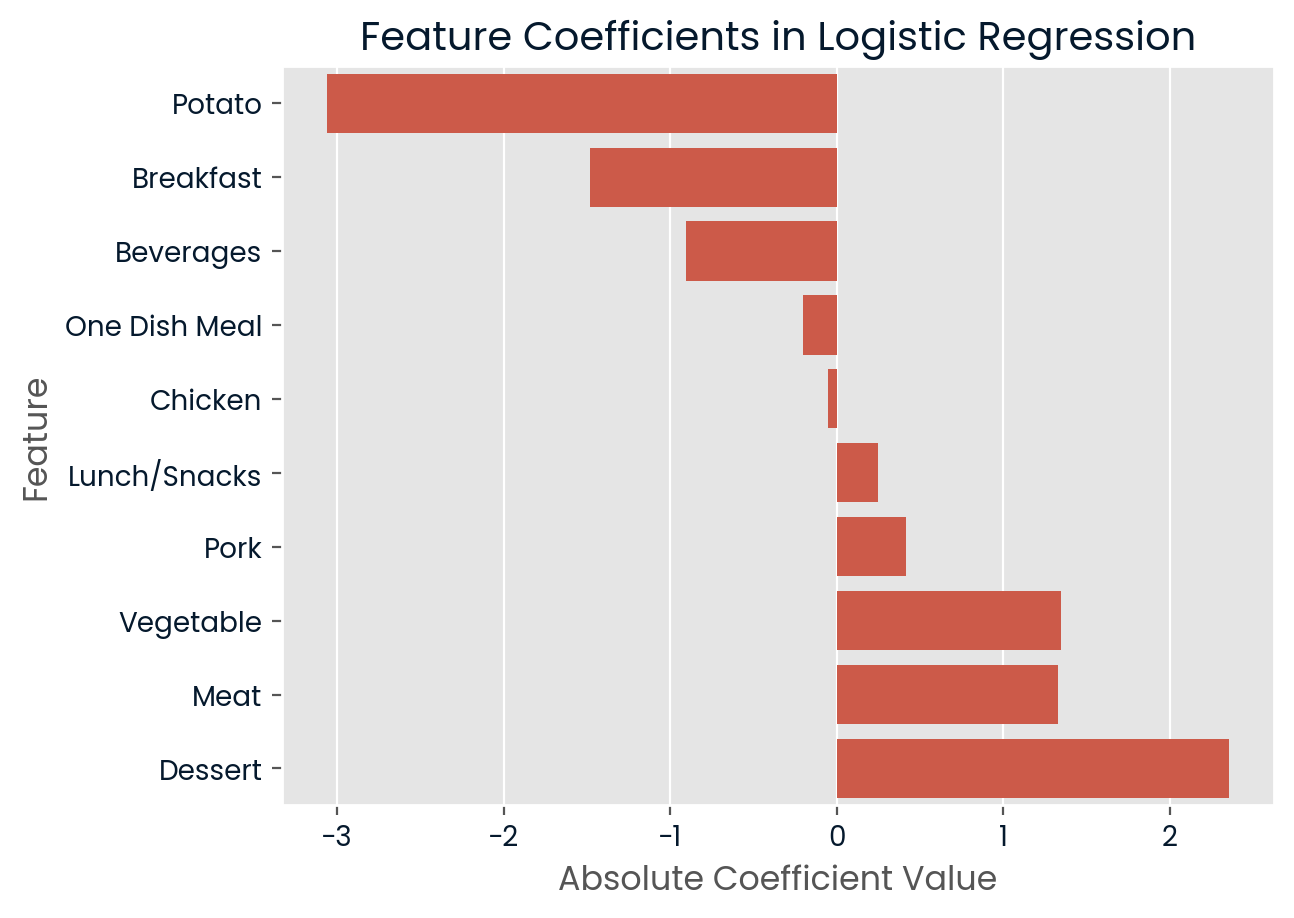

In [ ]:
# Building the model: LogisticRegression

logreg = LogisticRegression(random_state=42)
logreg.fit(X_train, y_train)
y_pred_logreg = logreg.predict(X_test)

accuracy_1 = accuracy_score(y_test, y_pred_logreg)
print(f'Accuracy: {accuracy_1}')

precision_1 = precision_score(y_test, y_pred_logreg)
print(f'Precision: {precision_1}')

conf_matrix_1 = confusion_matrix(y_test, y_pred_logreg)
print('Confusion Matrix:')
print(conf_matrix_1)

class_report_1 = classification_report(y_test, y_pred_logreg)
print('Classification Report:')
print(class_report_1)

# visualize the most important features
coefs = logreg.coef_[0]
print(coefs)

coefs_df = pd.DataFrame({
    'Feature': ['Potato', 'Breakfast', 'Beverages', 'One Dish Meal', 'Chicken', 'Lunch/Snacks',
 'Pork', 'Vegetable', 'Meat', 'Dessert'],
    'Coefficient': coefs
})

coefs_df['Absolute_Coefficient'] = coefs_df['Coefficient'].abs()

sns.barplot(x='Coefficient', y='Feature', data=coefs_df).set(title='Feature Coefficients in Logistic Regression', xlabel='Absolute Coefficient Value', ylabel='Feature')
plt.show()


DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_leaf=2,
                       min_samples_split=10, random_state=42)
Accuracy: 0.7027027027027027
Precision: 0.7471910112359551
Confusion Matrix:
[[ 75  45]
 [ 43 133]]
Classification Report:
              precision    recall  f1-score   support

           0       0.64      0.62      0.63       120
           1       0.75      0.76      0.75       176

    accuracy                           0.70       296
   macro avg       0.69      0.69      0.69       296
weighted avg       0.70      0.70      0.70       296

[0.18056814 0.1587976  0.09935196 0.08378391 0.44864781 0.02885057]


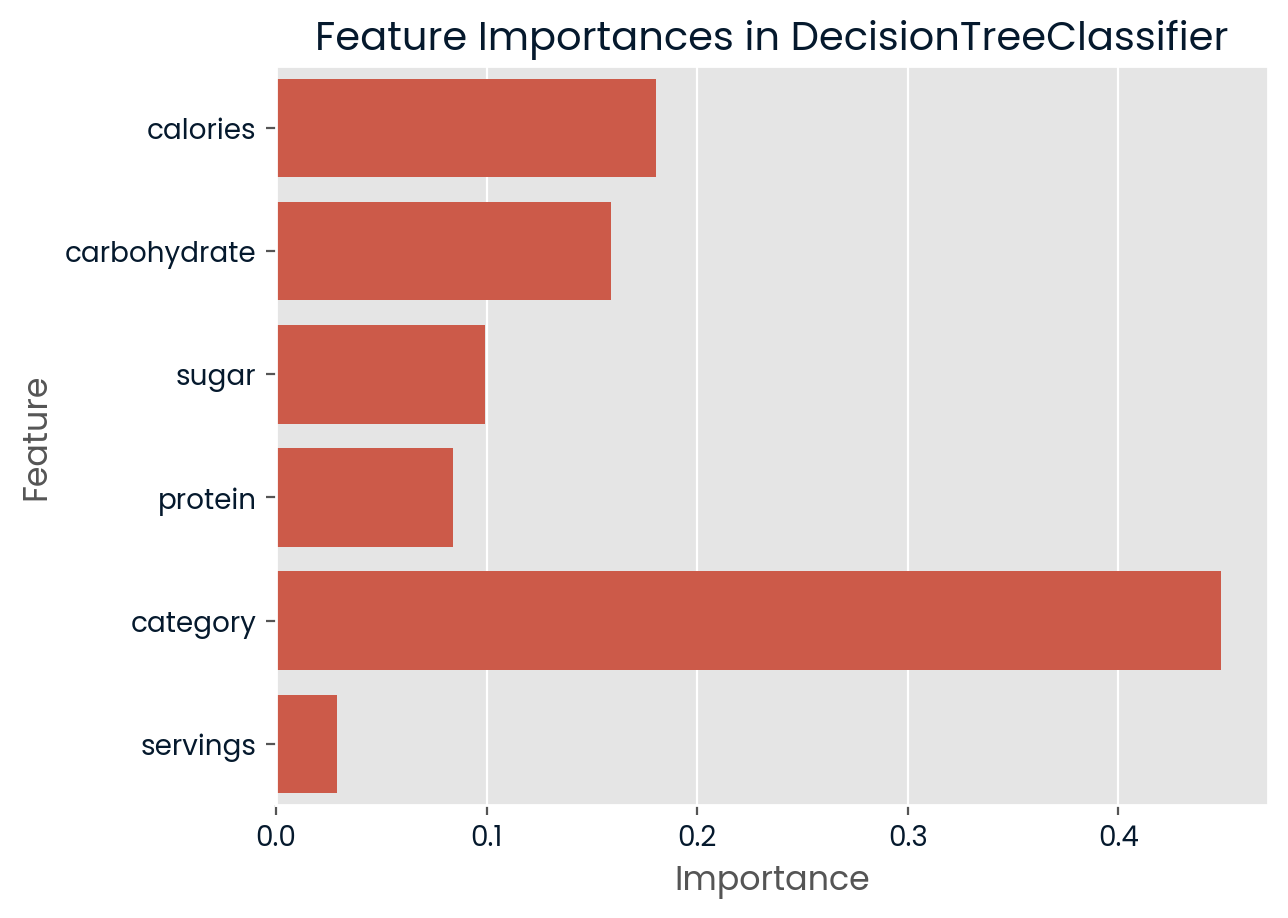

In [ ]:
# Building the model: DecisionTreeClassifier

# finding the best parameters for the tree
tree = DecisionTreeClassifier(random_state=42)

param_grid = {
    'criterion': ['gini', 'entropy', 'log_loss'],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(estimator=tree, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_estimator_
print(best_params)

# fit model with best parameters
dec_tree = DecisionTreeClassifier(random_state=42, criterion='entropy', max_depth=10, min_samples_leaf=2, min_samples_split=10)
dec_tree.fit(X_train, y_train)
y_pred_dec_tree = dec_tree.predict(X_test)

accuracy_2 = accuracy_score(y_test, y_pred_dec_tree)
print(f'Accuracy: {accuracy_2}')

precision_2 = precision_score(y_test, y_pred_dec_tree)
print(f'Precision: {precision_2}')

conf_matrix_2 = confusion_matrix(y_test, y_pred_dec_tree)
print('Confusion Matrix:')
print(conf_matrix_2)

class_report_2 = classification_report(y_test, y_pred_dec_tree)
print('Classification Report:')
print(class_report_2)

# visualize the most important features
importance_dec = dec_tree.feature_importances_
print(importance_dec)

importance_dec_df = pd.DataFrame({
    'Feature': df.drop(['high_traffic', 'recipe'], axis=1).columns,
    'Importance': importance_dec
})

sns.barplot(x='Importance', y='Feature', data=importance_dec_df).set(title='Feature Importances in DecisionTreeClassifier', xlabel='Importance', ylabel='Feature')
plt.show()


Accuracy: 0.7466216216216216
Precision: 0.7563451776649747
Confusion Matrix:
[[ 72  48]
 [ 27 149]]
Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.60      0.66       120
           1       0.76      0.85      0.80       176

    accuracy                           0.75       296
   macro avg       0.74      0.72      0.73       296
weighted avg       0.74      0.75      0.74       296

[0.14370126 0.1280127  0.12160581 0.16961609 0.3992048  0.03785934]


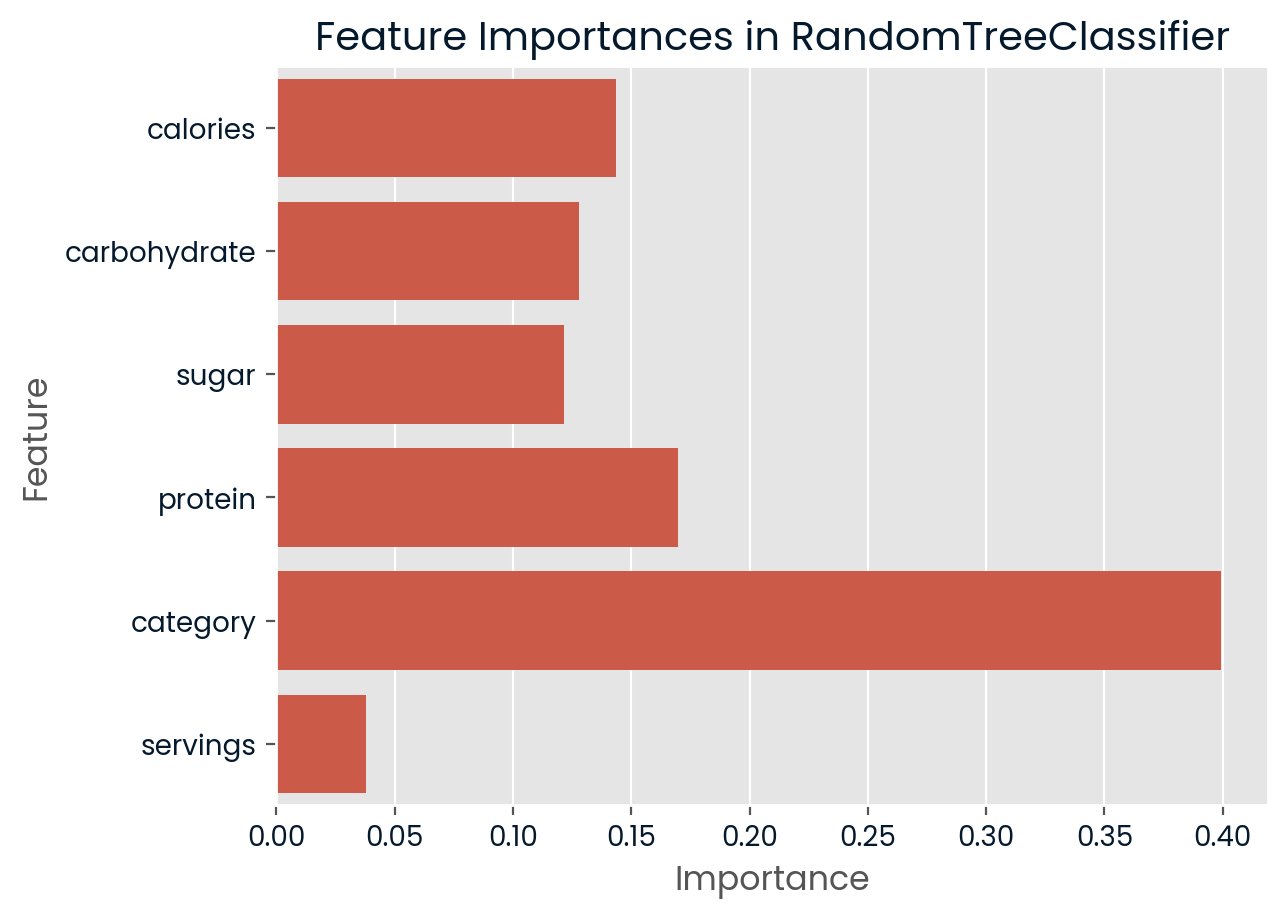

In [ ]:
# Building the model: RandomForestClassifier

# finding the best parameters for the tree
# blended out code, because initial run took about 10mins, this were the results:
# RandomForestClassifier(max_depth=10, min_samples_leaf=2, min_samples_split=10, n_estimators=200, random_state=42)

'''ra_tree = RandomForestClassifier(random_state=42)

param_grid = {
    'criterion': ['gini', 'entropy', 'log_loss'],
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

ra_grid_search = GridSearchCV(estimator=ra_tree, param_grid=param_grid, cv=5)
ra_grid_search.fit(X_train, y_train)

best_params_ra = ra_grid_search.best_estimator_
print(best_params_ra)'''

# fit model with best parameters
random_tree = RandomForestClassifier(n_estimators=200, random_state=42, criterion='entropy', max_depth=10, min_samples_leaf=2, min_samples_split=10)
random_tree.fit(X_train, y_train)
y_pred_ran_tree = random_tree.predict(X_test)

accuracy_3 = accuracy_score(y_test, y_pred_ran_tree)
print(f'Accuracy: {accuracy_3}')

precision_3 = precision_score(y_test, y_pred_ran_tree)
print(f'Precision: {precision_3}')

conf_matrix_3 = confusion_matrix(y_test, y_pred_ran_tree)
print('Confusion Matrix:')
print(conf_matrix_3)

class_report_3 = classification_report(y_test, y_pred_ran_tree)
print('Classification Report:')
print(class_report_3)

# visualize the most important features
importance_ran = random_tree.feature_importances_
print(importance_ran)

importance_ran_df = pd.DataFrame({
    'Feature': df.drop(['high_traffic', 'recipe'], axis=1).columns,
    'Importance': importance_ran
})

sns.barplot(x='Importance', y='Feature', data=importance_ran_df).set(title='Feature Importances in RandomTreeClassifier', xlabel='Importance', ylabel='Feature')
plt.show()


# **Results:**

The task was to a) find a model which predicts which recipes will lead to high traffic and b) correctly predicts high traffic recipes 80% of the time. Of the three models tested the **LogisticRegression** had the highest accuracy overall as well as the highest precision. This means, that it´s the model that not only predicts the most labels correctly (if the recipe will generate high traffic or not) but when it predicts a high traffic recipe it´s right more times than the other models.
Furtermore in all three models the feature "category" was by far the most impactful. Meaning that which type of recipe it is matters the most, while other factors such as nutritional values or the number of servings matters less.


# Evaluate by business criteria:

The Product Management wants a model to correctly predict high traffic recipes 80% of the time. Hence, we should use the precision score of the models for comparison of the three models. The higher the percentage, the better the model performs. For the logistic regression the precision score for the positive values ('high_traffic') is 80%, while the DecisionTreeClassifier and the RandomForestClassifier score 75% and 76% respectively.


# Recommendations:

To help the Product Management Team in finding recipes that generate a lot of traffic on the website, I would recommend implementing a Logistic Regression Model as it has shown to deliver the best results in testing. This way the team would be able to predict high traffic recipes at least 80% of the time. I would also recommend to keep on training the model with more recipes as well as more data for every single recipe (for example 'cost per serving' or 'time to make' as stated on the website) as this may improve model performance even more. Finetuning parameters is also recommended. We should also keep an eye on the predicted amount of traffic and the amount it really generates on the website. 